In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [16]:
#Load Train Data
dftrain = pd.read_csv('poker-hand-training-true.data', header = None)
dftrain_col = ["Suit of card #1","Rank of card #1","Suit of card #2","Rank of card #2","Suit of card #3","Rank of card #3","Suit of card #4","Rank of card #4","Suit of card #5","Rank of card #5","Poker Hand"]
for i, col in enumerate(dftrain.columns):
    dftrain.rename(columns={col: dftrain_col[i]}, inplace=True)
    
dftrain

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


In [17]:
#Load Test Data
dftest = pd.read_csv('poker-hand-testing.data', header = None)
dftrain_col = ["Suit of card #1","Rank of card #1","Suit of card #2","Rank of card #2","Suit of card #3","Rank of card #3","Suit of card #4","Rank of card #4","Suit of card #5","Rank of card 5","Poker Hand"]
for i, col in enumerate(dftest.columns):
    dftest.rename(columns={col: dftrain_col[i]}, inplace=True)

In [18]:
dftrain.describe()

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [19]:
dftrain.isnull().sum()

Suit of card #1    0
Rank of card #1    0
Suit of card #2    0
Rank of card #2    0
Suit of card #3    0
Rank of card #3    0
Suit of card #4    0
Rank of card #4    0
Suit of card #5    0
Rank of card #5    0
Poker Hand         0
dtype: int64

In [20]:
#Check Duplicate
print(dftrain[dftrain.duplicated()])

       Suit of card #1  Rank of card #1  Suit of card #2  Rank of card #2  \
11914                3               12                3                2   
12050                4                2                2                5   

       Suit of card #3  Rank of card #3  Suit of card #4  Rank of card #4  \
11914                2                8                1                2   
12050                4                9                2                7   

       Suit of card #5  Rank of card #5  Poker Hand  
11914                2                3           1  
12050                2                2           1  


In [21]:
#Before Removeing
dftrain.value_counts().sum()

25010

In [22]:
#Remove Duplicate
dftrain = dftrain.drop_duplicates()
#After Removing
dftrain.value_counts().sum()

25008

<Figure size 1000x600 with 0 Axes>

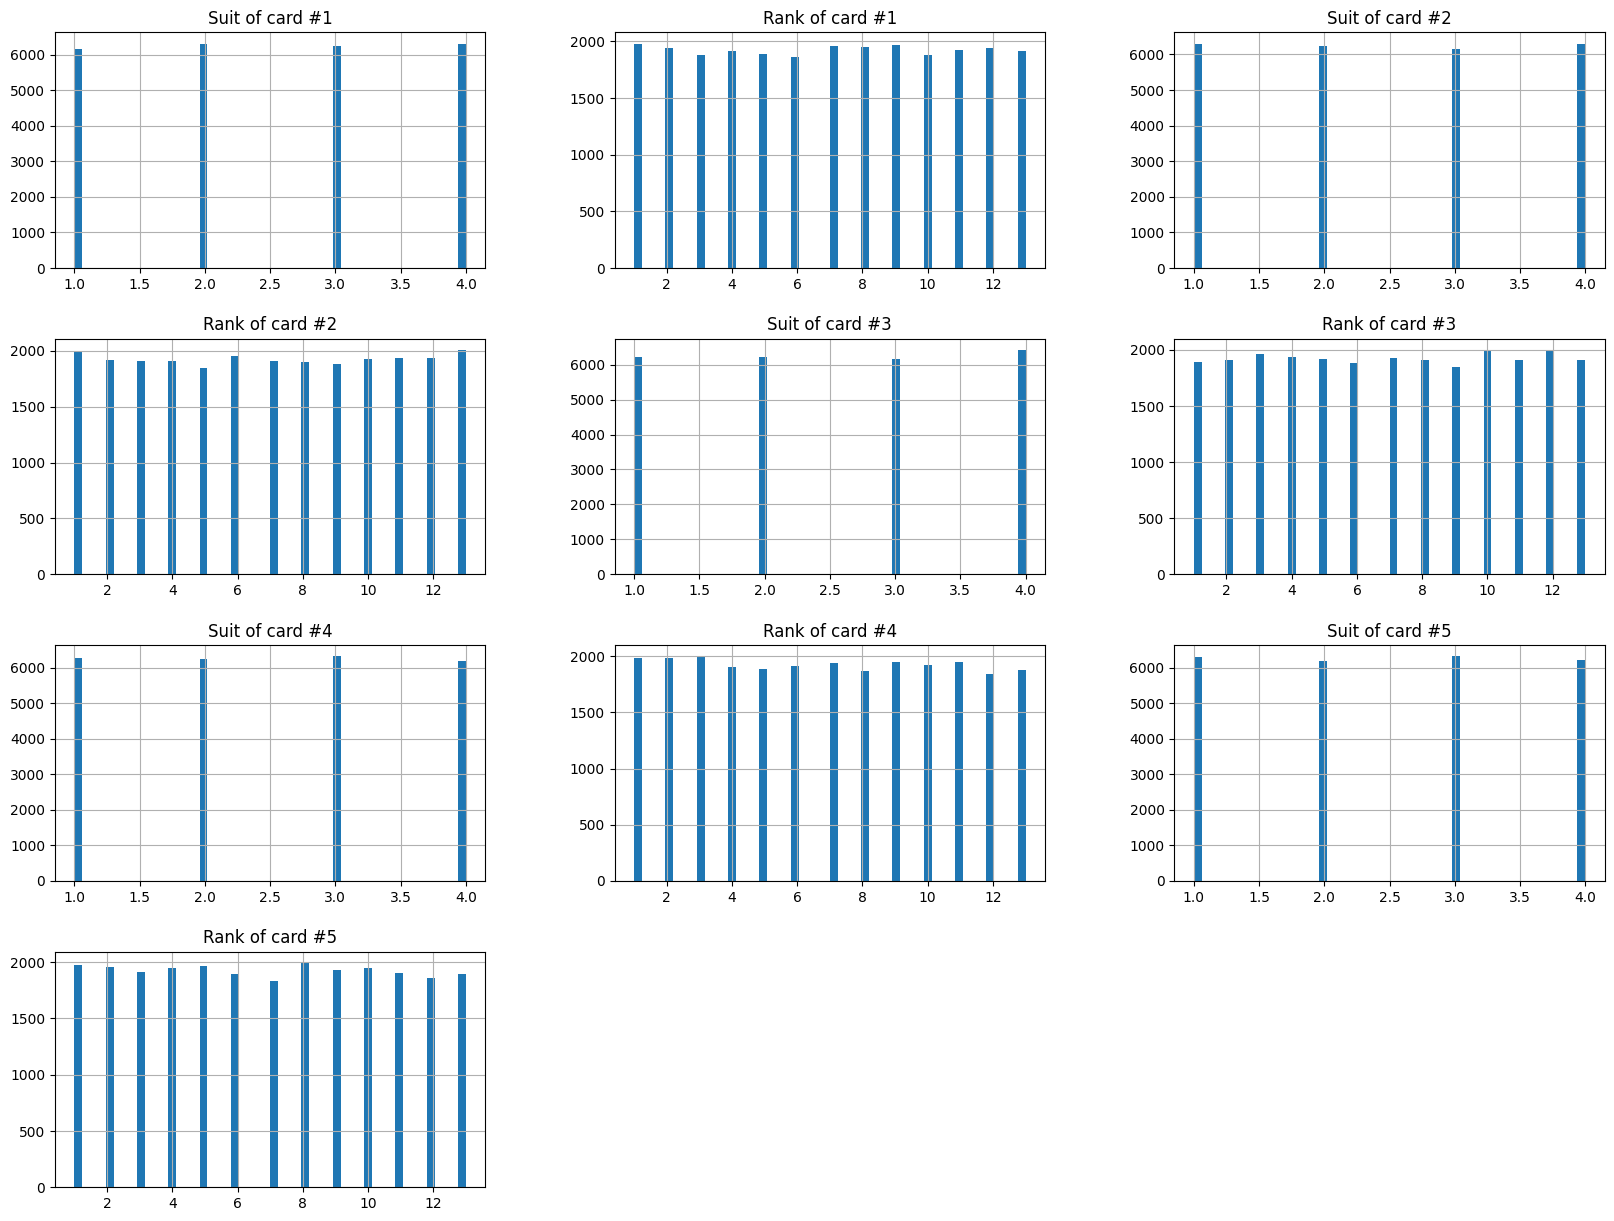

In [23]:
#Data Visualizing
dfplot = dftrain.drop('Poker Hand',axis=1, inplace = False)
plt.figure(figsize=(10, 6))
dfplot.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
#Model Training Preparing
X_train = dftrain.drop('Poker Hand',axis=1, inplace = False)
y_train = dftrain['Poker Hand']
X_test = dftest.drop('Poker Hand',axis=1, inplace = False)
y_test = dftest['Poker Hand']


In [48]:
#Standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


D:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.501209

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.615474

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc.score(X_test, y_test)

0.511974

In [42]:
#building
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
sq = Sequential()
sq.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
sq.add(Dense(64, activation='relu'))
sq.add(Dense(10, activation='softmax'))

sq.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1408      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 10314 (40.29 KB)
Trainable params: 10314 (40.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
#Compile
sq.compile(optimizer='Nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [63]:
#lần 1 thử
sq.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
782/782 [==============================] - 23s 30ms/step - loss: 0.2693 - accuracy: 0.9041 - val_loss: 0.3954 - val_accuracy: 0.8499
Epoch 2/50
782/782 [==============================] - 23s 29ms/step - loss: 0.2571 - accuracy: 0.9083 - val_loss: 0.3899 - val_accuracy: 0.8474
Epoch 3/50
782/782 [==============================] - 23s 29ms/step - loss: 0.2470 - accuracy: 0.9136 - val_loss: 0.3427 - val_accuracy: 0.8721
Epoch 4/50
782/782 [==============================] - 23s 29ms/step - loss: 0.2353 - accuracy: 0.9189 - val_loss: 0.3198 - val_accuracy: 0.8831
Epoch 5/50
782/782 [==============================] - 23s 29ms/step - loss: 0.2277 - accuracy: 0.9214 - val_loss: 0.3321 - val_accuracy: 0.8745
Epoch 6/50
782/782 [==============================] - 23s 29ms/step - loss: 0.2168 - accuracy: 0.9272 - val_loss: 0.3092 - val_accuracy: 0.8860
Epoch 7/50
782/782 [==============================] - 23s 30ms/step - loss: 0.2081 - accuracy: 0.9285 - val_loss: 0.2943 - val_accuracy:

In [ ]:
#note 
#với mô hình epoch 10 và batch_size 32
#thay đổi optimizer
# Adam : cao nhất 58%
# SGD : cao nhất 59%
# RMSprop : loss: 0.8070 - accuracy: 0.6414 - val_loss: 0.8570 - val_accuracy: 0.6122
# Adagrad : loss: 0.7536 - accuracy: 0.6763 - val_loss: 0.8311 - val_accuracy: 0.6343
# Adadelta : loss: 0.7523 - accuracy: 0.6769 - val_loss: 0.8310 - val_accuracy: 0.6346 Thằng này với thằng trên tuy cao nhưng hầu như không thay đổi kể từ lần train thứ 5
# Nadam : loss: 0.6641 - accuracy: 0.7106 - val_loss: 0.7416 - val_accuracy: 0.6783 => tiềm năng nên chọn

# => chọn optimizer nadam và train cho tới khi có accuracy cao nhất 
#epoch 20 và batch size 64: loss: 0.4908 - accuracy: 0.8004 - val_loss: 0.6329 - val_accuracy: 0.7330 tuy cao nhưng có vẻ tập train và val có vẻ khá chênh lệch nên giảm batch size xuống
#epoch 20 và batch size 32: loss: 0.2807 - accuracy: 0.8994 - val_loss: 0.3767 - val_accuracy: 0.8578 con số khá tốt tiếp tục nâng epoch và train cho tới khi có kết quả tốt nhất
#epoch 50 và batch size 32:
#Epoch 49/50
#782/782 [==============================] - 23s 30ms/step - loss: 0.0408 - accuracy: 0.9915 - val_loss: 0.1983 - val_accuracy: 0.9364
#Epoch 50/50
#782/782 [==============================] - 23s 30ms/step - loss: 0.0480 - accuracy: 0.9888 - val_loss: 0.1024 - val_accuracy: 0.9744
#trước đó có 1 cái bị overfitting nên chắc dừng được rồi

In [64]:
from tensorflow.keras.models import save_model

# Lưu mô hình
sq.save('poker_hand_model')

INFO:tensorflow:Assets written to: poker_hand_model\assets


INFO:tensorflow:Assets written to: poker_hand_model\assets


In [ ]:
#Do là bài này data không cần phải xử lý nhiều nên em làm thêm deploy 

In [25]:
#load model đã save
from tensorflow.keras.models import load_model
poker_model = load_model('poker_hand_model')

In [27]:
#Tạo hàm lấy input
def get_card_info(number,card_info,check_duplicates):
    while True:
        print('==========================================================')
        while True:
            print('1:Cơ \n2:Bích \n3:Rô \n4:Chuồng')
            type = int(input(f'Chọn loại bài cho lá thứ {number}:'))
            if type >=1 and type <=4:
                break
            else:
                print('Không hợp lệ vui lòng nhập lại')
                continue
        print('==========================================================')
        while True:
            print('1: A \n|\n13: K')
            value = int(input(f'Chọn giá trị bài cho lá thứ {number}:'))
            if type >=1 and type <=13:
                break
            else:
                print('Không hợp lệ vui lòng nhập lại')
                continue
        if any(item == (type, value) for item in check_duplicates.items()):
            print('Lá bài đã trùng, vui lòng nhập lại')
            continue
        else:
            card_info[f'Rank of card #{number}'] = [value]
            card_info[f'Suit of card #{number}'] = [type]
            check_duplicates.update({type : value})
            break

In [9]:
def num_to_text(number):
    texts = ['Không có gì', 'Có 1 đôi','Có 2 đôi','Có 3 lá', 'Có Sảnh', 'Có Thùng','Có cù lũ', 'Có Tứ Quý', 'Có Sảnh Đồng Chất','Có Thùng Phá Sảnh']
    return texts[number]

In [28]:
card_info = {}
check_duplicates = {}
get_card_info(1,card_info,check_duplicates)
get_card_info(2,card_info,check_duplicates)
get_card_info(3,card_info,check_duplicates)
get_card_info(4,card_info,check_duplicates)
get_card_info(5,card_info,check_duplicates)

dfpredict = pd.DataFrame.from_dict(card_info)

prediction = poker_model.predict(dfpredict)
prediction = prediction.argmax(axis=-1)
print('==========================================================')
print('Dự Đoán: ' + num_to_text(int(prediction)))
print('==========================================================')

1:Cơ 
2:Bích 
3:Rô 
4:Chuồng


Chọn loại bài cho lá thứ 1: 1


1: A 
|
13: K


Chọn giá trị bài cho lá thứ 1: 1


1:Cơ 
2:Bích 
3:Rô 
4:Chuồng


Chọn loại bài cho lá thứ 2: 2


1: A 
|
13: K


Chọn giá trị bài cho lá thứ 2: 8


1:Cơ 
2:Bích 
3:Rô 
4:Chuồng


Chọn loại bài cho lá thứ 3: 3


1: A 
|
13: K


Chọn giá trị bài cho lá thứ 3: 4


1:Cơ 
2:Bích 
3:Rô 
4:Chuồng


Chọn loại bài cho lá thứ 4: 1


1: A 
|
13: K


Chọn giá trị bài cho lá thứ 4: 5


1:Cơ 
2:Bích 
3:Rô 
4:Chuồng


Chọn loại bài cho lá thứ 5: 2


1: A 
|
13: K


Chọn giá trị bài cho lá thứ 5: 9


1/1 [==============================] - 0s 31ms/step
Dự Đoán: Có 1 đôi


C:\Users\Thien Phuc\AppData\Local\Temp\ipykernel_18200\2155047313.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Dự Đoán: ' + num_to_text(int(prediction)))
